In [1]:
from os import listdir
from os.path import isdir, join
import tensorflow
from tensorflow.keras import layers, models
import numpy as np

print(tensorflow.__file__)
print(tensorflow.keras.__file__)

C:\Users\soong\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\__init__.py
C:\Users\soong\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\keras\__init__.py


In [2]:
# Create list of all targets (minus background noise)
dataset_path = "C:\\Users\\soong\\OneDrive\\Desktop\\DEEP LEARNING FYP\\Training_LATEST\\Dataset"
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['0_Noise', '1_Explosion']


In [ ]:
# Other Testing dataset

testing_path = 


In [3]:
# Settings
feature_sets_path = "C:\\Users\\soong"
feature_sets_filename = 'all_targets_mfcc_sets.npz'
model_filename = 'fyp_explosion_CNN_model.h5'
explosion_signal = '1_Explosion'

In [4]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [5]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [6]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(10620, 16, 28)
(5310, 16, 28)
(1770, 16, 28)


In [7]:
# Peek at labels
print(y_val)

[1. 0. 1. ... 1. 1. 1.]


In [8]:
# Convert ground truth arrays to one wake word (1) and 'other' (0)
explosion_signal_index = all_targets.index(explosion_signal)
y_train = np.equal(y_train, explosion_signal_index).astype('float64')
y_val = np.equal(y_val, explosion_signal_index).astype('float64')
y_test = np.equal(y_test, explosion_signal_index).astype('float64')

print(y_train)
print(y_train)
print(y_val)

[1. 1. 0. ... 1. 1. 1.]
[1. 1. 0. ... 1. 1. 1.]
[1. 0. 1. ... 1. 1. 1.]


In [9]:
# What percentage of 'Explosion' appear in validation labels
print(sum(y_val) / len(y_val))
print(1 - sum(y_val) / len(y_val))

0.8495291902071563
0.15047080979284366


In [10]:
# View the dimensions of our input data
print(x_train.shape)

(10620, 16, 28)


In [11]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1

x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(10620, 16, 28, 1)
(5310, 16, 28, 1)
(1770, 16, 28, 1)


In [12]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(16, 28, 1)


In [13]:
# Build model
# Based on: https://www.geeksforgeeks.org/python-image-classification-using-keras/
#32 nodes in 1st conv layer (32 differnt filtered images), window of 2x2 pixels for sliding window convolution
# relu sets -ve values to zero, max pool reduces feature size by downsmapling, saves computation for next layer

model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu',input_shape=sample_shape)) 
model.add(layers.MaxPooling2D(pool_size=(2, 2)))    

model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
    

In [14]:
# create network
input_shape = (1,31,16) 
model.build(input_shape)

# compile model
optimiser = tensorflow.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 15, 27, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 13, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 12, 32)         4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 5, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [15]:
# Display model
model.summary() # total parameters: no. of weights or other parameters that can be trained in the model, gives an idea of how many math operations are needed to train model, as low as possible.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 15, 27, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 13, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 12, 32)         4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 5, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [16]:
# Add training parameters to model, can be changed to affect training performance
model.compile(loss='binary_crossentropy', # calc. how far the prediction is from the actual value during training, binary classification problem
              optimizer='rmsprop', # sgd, rmsprop, adam. 
              metrics=['acc']) #

In [17]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=30, # can be changed to affect performance
                    batch_size=100, # " "
                    validation_data=(x_val, y_val))

Epoch 1/30
107/107 [==============================] - 2s 17ms/step - loss: 0.0396 - acc: 0.9833 - val_loss: 2.1856e-05 - val_acc: 1.0000
Epoch 2/30
107/107 [==============================] - 2s 15ms/step - loss: 0.0012 - acc: 0.9996 - val_loss: 9.1008e-07 - val_acc: 1.0000
Epoch 3/30
107/107 [==============================] - 2s 17ms/step - loss: 1.8672e-04 - acc: 0.9999 - val_loss: 9.7717e-09 - val_acc: 1.0000
Epoch 4/30
107/107 [==============================] - 2s 20ms/step - loss: 1.4499e-05 - acc: 1.0000 - val_loss: 6.1025e-11 - val_acc: 1.0000
Epoch 5/30
107/107 [==============================] - 2s 20ms/step - loss: 4.7559e-06 - acc: 1.0000 - val_loss: 3.7243e-11 - val_acc: 1.0000
Epoch 6/30
107/107 [==============================] - 2s 19ms/step - loss: 1.2775e-04 - acc: 1.0000 - val_loss: 4.4253e-12 - val_acc: 1.0000
Epoch 7/30
107/107 [==============================] - 2s 19ms/step - loss: 8.9316e-07 - acc: 1.0000 - val_loss: 9.5728e-12 - val_acc: 1.0000
Epoch 8/30
107/107 [=

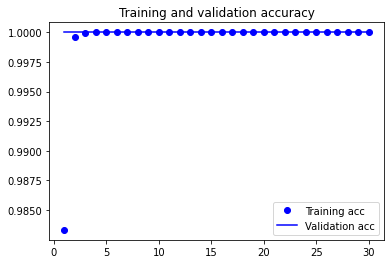

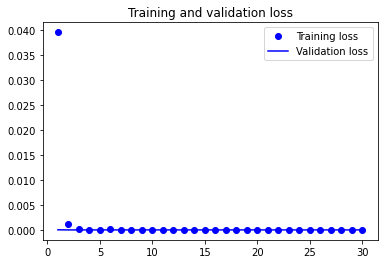

In [20]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
# Save the model as a file
#models.save_model(model, model_filename)

models.save_model(
    model, model_filename, overwrite=True, include_optimizer=True, save_format='h5',
    signatures=None, options=None)

In [22]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

56/56 [==============================] - 0s 3ms/step - loss: 1.4130e-19 - acc: 1.0000


[1.4129609710416425e-19, 1.0]